In [1]:
import tensorflow as tf

In [2]:
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

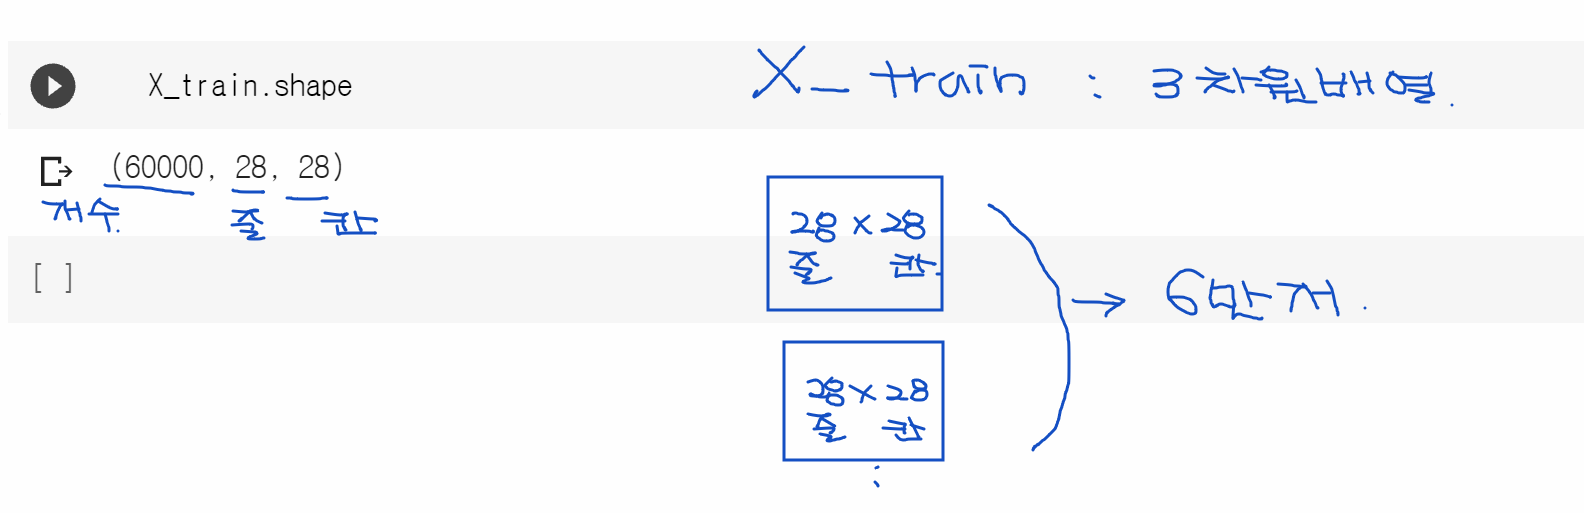

In [7]:
X_train.shape

(60000, 28, 28)

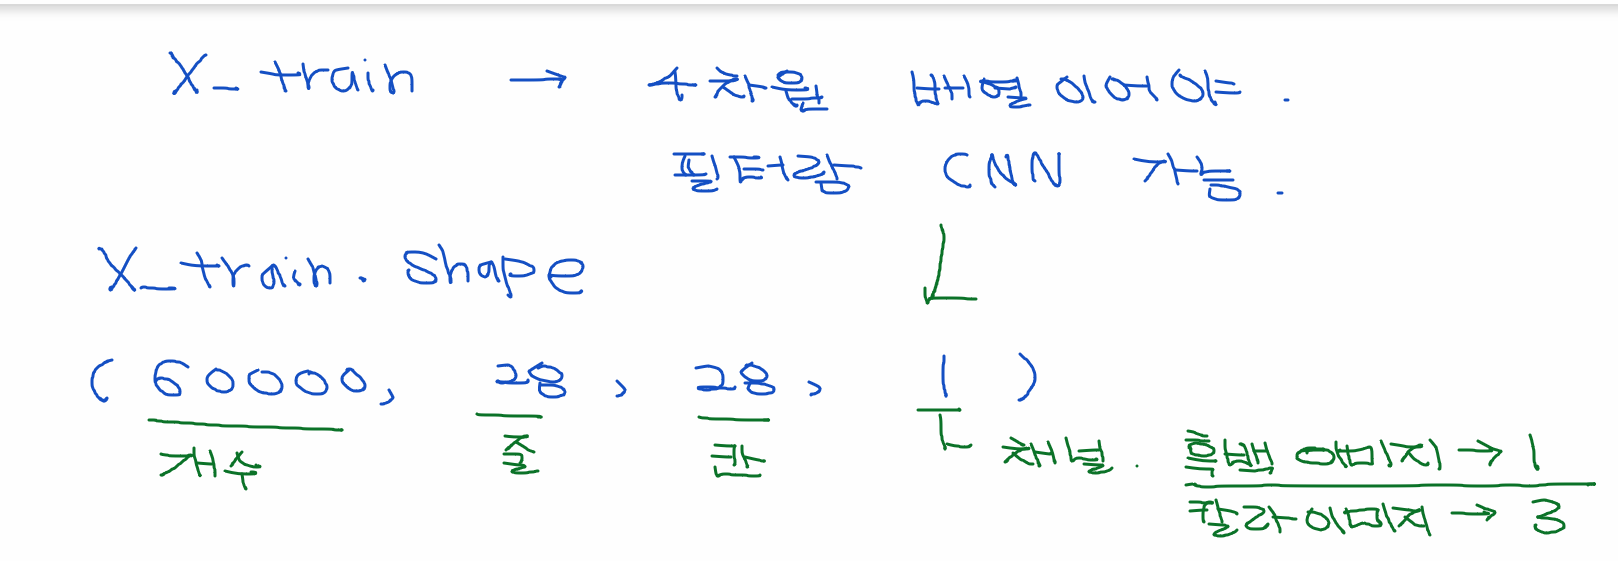

In [8]:
X_train = X_train.reshape(60000, 28, 28, 1)

In [9]:
X_train.shape

(60000, 28, 28, 1)

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
y_train.shape

(60000,)

In [12]:
y_train = y_train.reshape(-1, 1)

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
enc = OneHotEncoder()

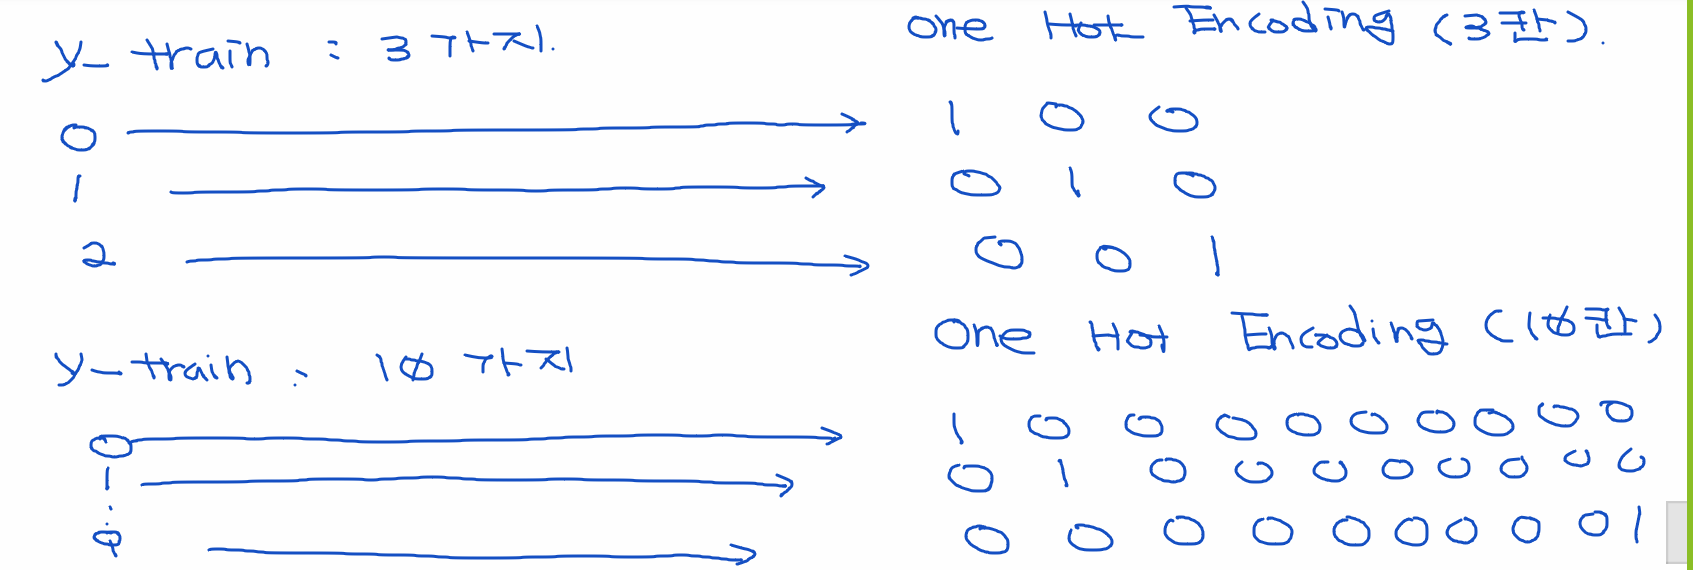

In [15]:
enc.fit(y_train)

OneHotEncoder()

In [16]:
y_train_onehot = enc.transform(y_train).toarray()

In [17]:
y_train_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [18]:
import numpy as np

In [19]:
y_train_onehot = np.array(y_train_onehot, dtype="float32")

In [20]:
y_train_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [21]:
from tensorflow.keras.models import Sequential

In [22]:
model = Sequential()

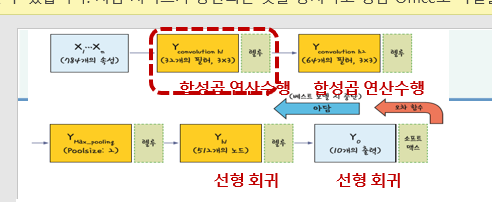

In [23]:
from tensorflow.keras.layers import Conv2D

In [24]:
model.add(Conv2D(
                  32, kernel_size=(3,3), strides=1
                 ,input_shape=(28, 28, 1)
                 , padding="SAME",
                 activation="relu"
                 )
)

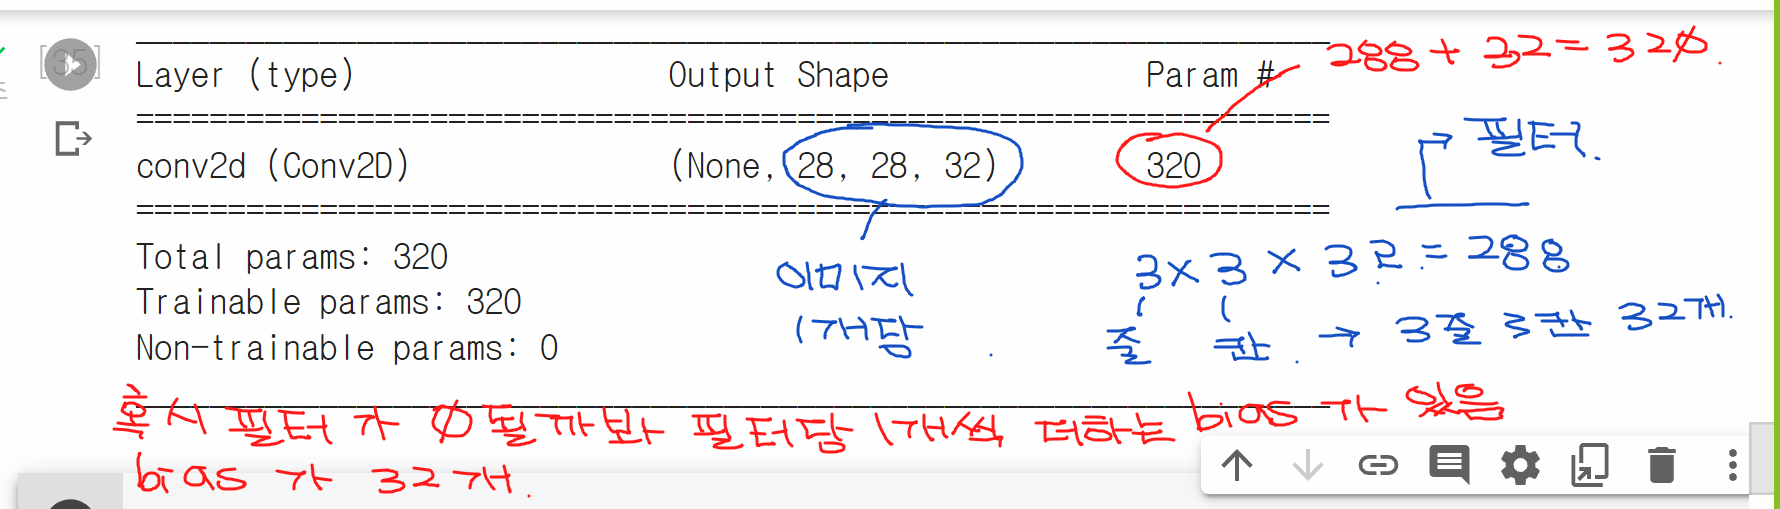

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


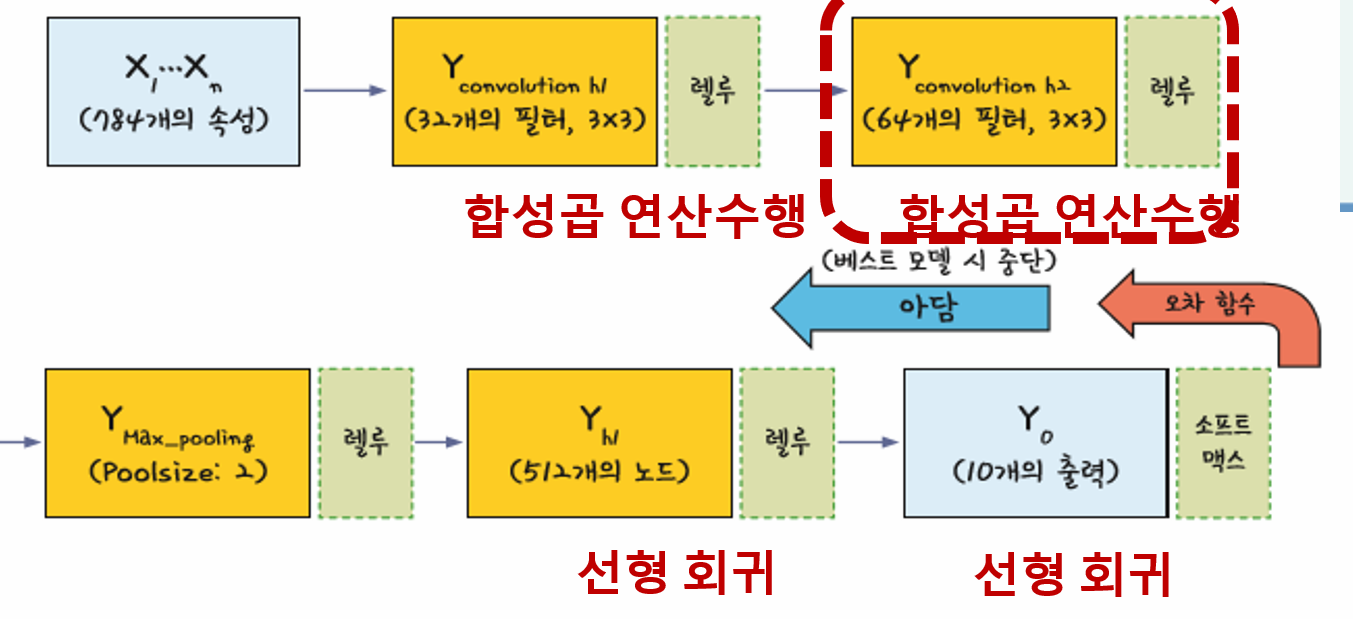

In [26]:
model.add(
            Conv2D(
                     64, kernel_size=(3,3), strides=1,
                     activation="relu", padding="SAME" 
                   )
)

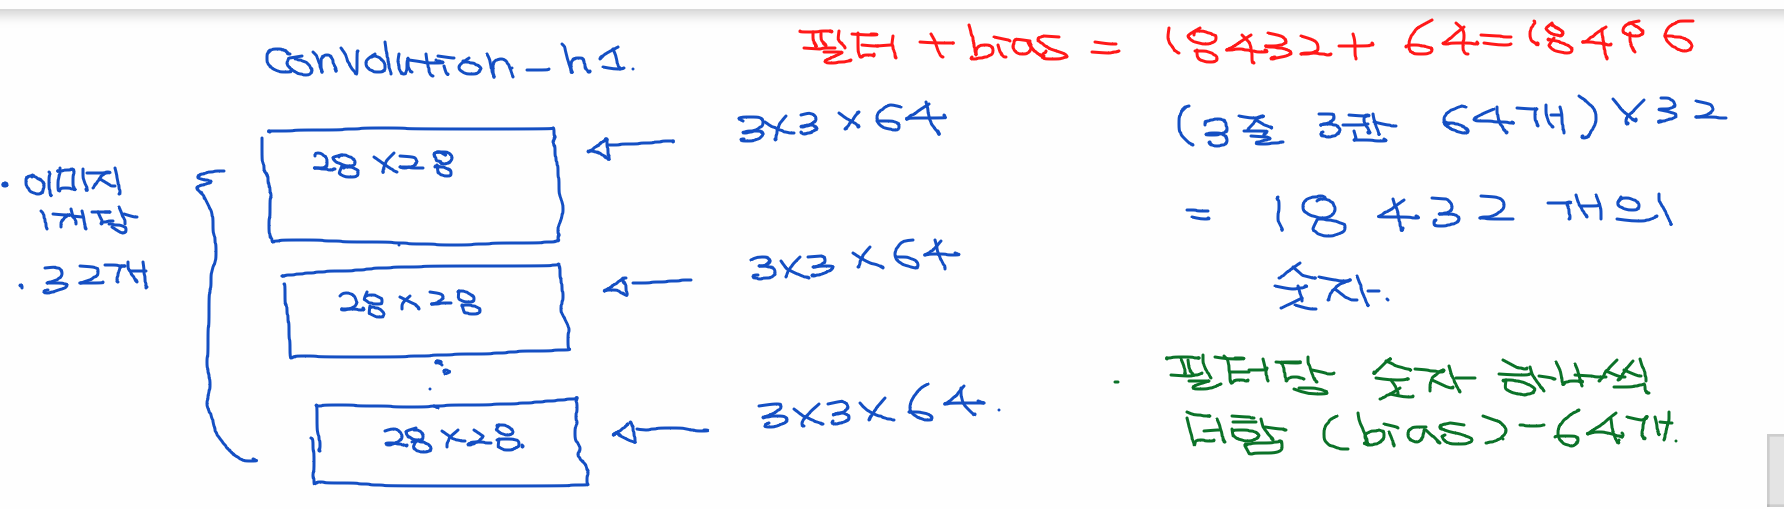

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


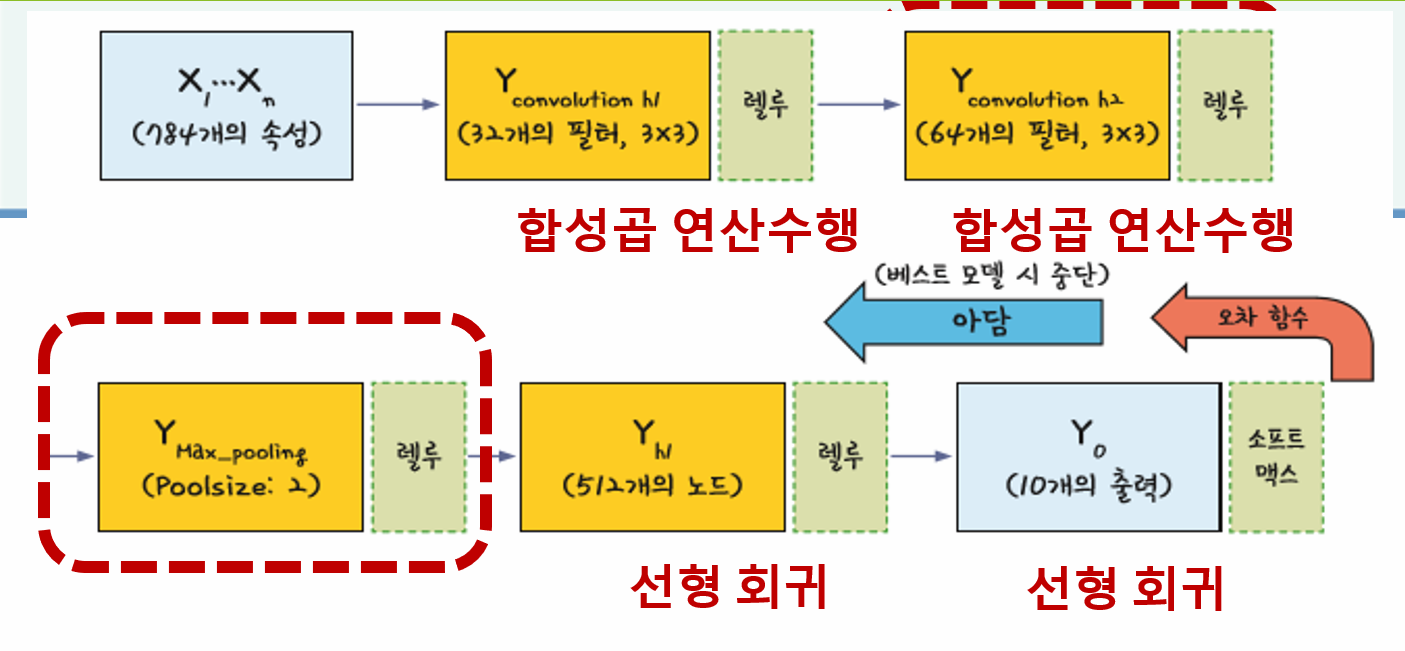

In [28]:
from tensorflow.keras.layers import MaxPooling2D

In [29]:
model.add(MaxPooling2D(pool_size=2, strides=1, padding="SAME"))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 64)        0         
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


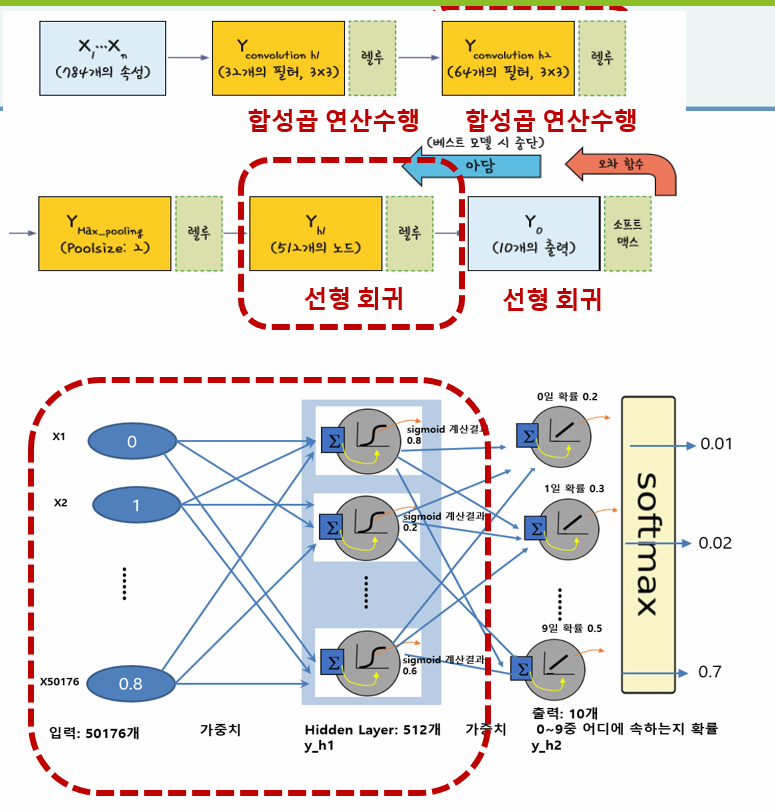

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 64)        0         
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


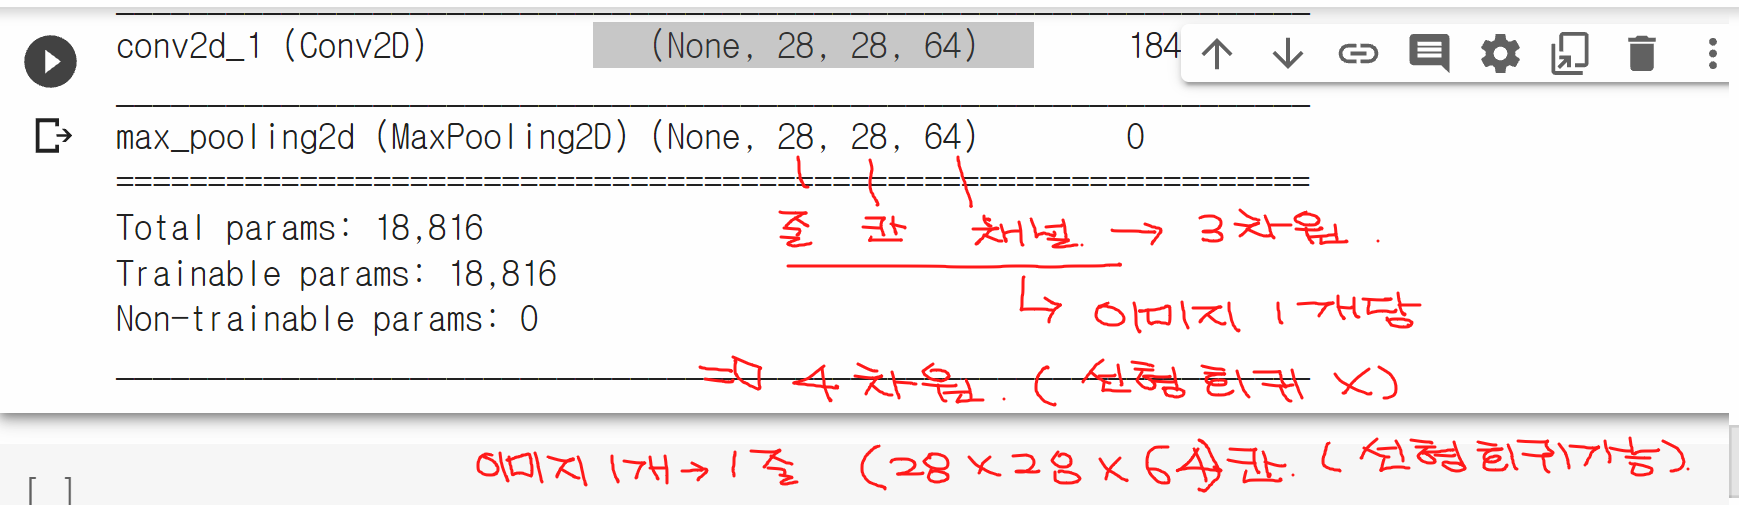

In [32]:
from tensorflow.keras.layers import Flatten

In [33]:
model.add(Flatten())

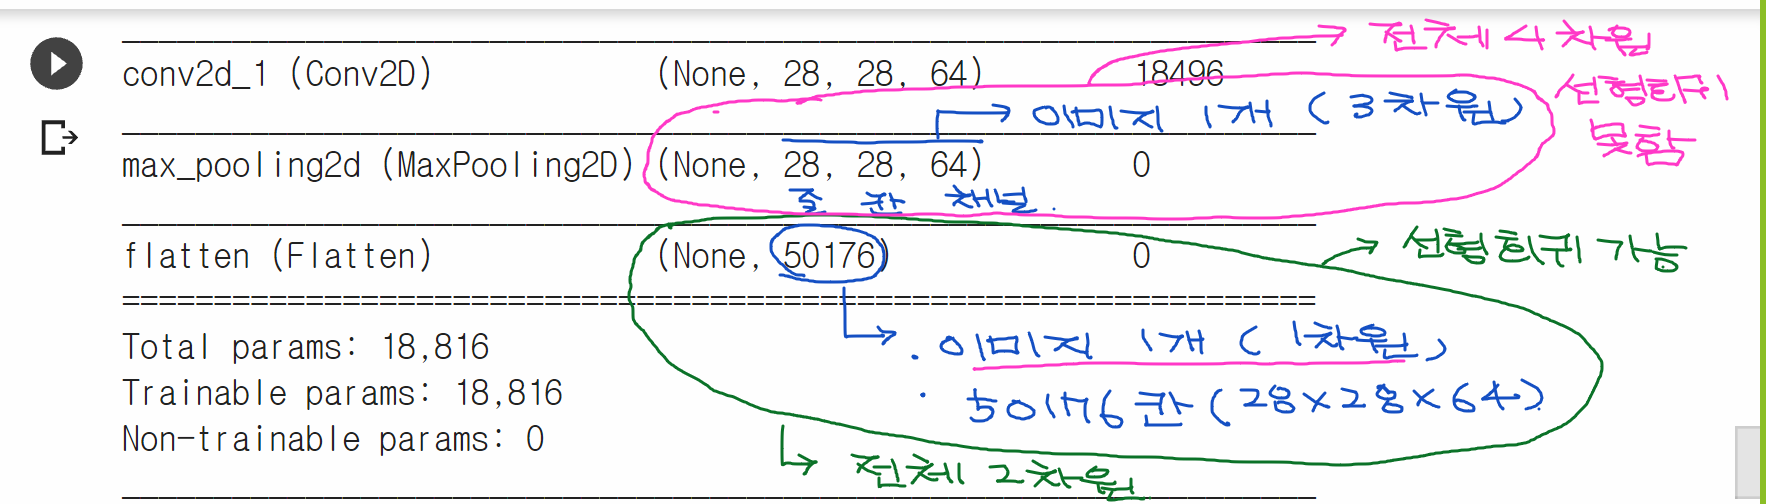

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [35]:
from tensorflow.keras.layers import Dense

In [36]:
model.add(Dense(512, activation="relu"))

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               25690624  
Total params: 25,709,440
Trainable params: 25,709,440
Non-trainable params: 0
_________________________________________________________________


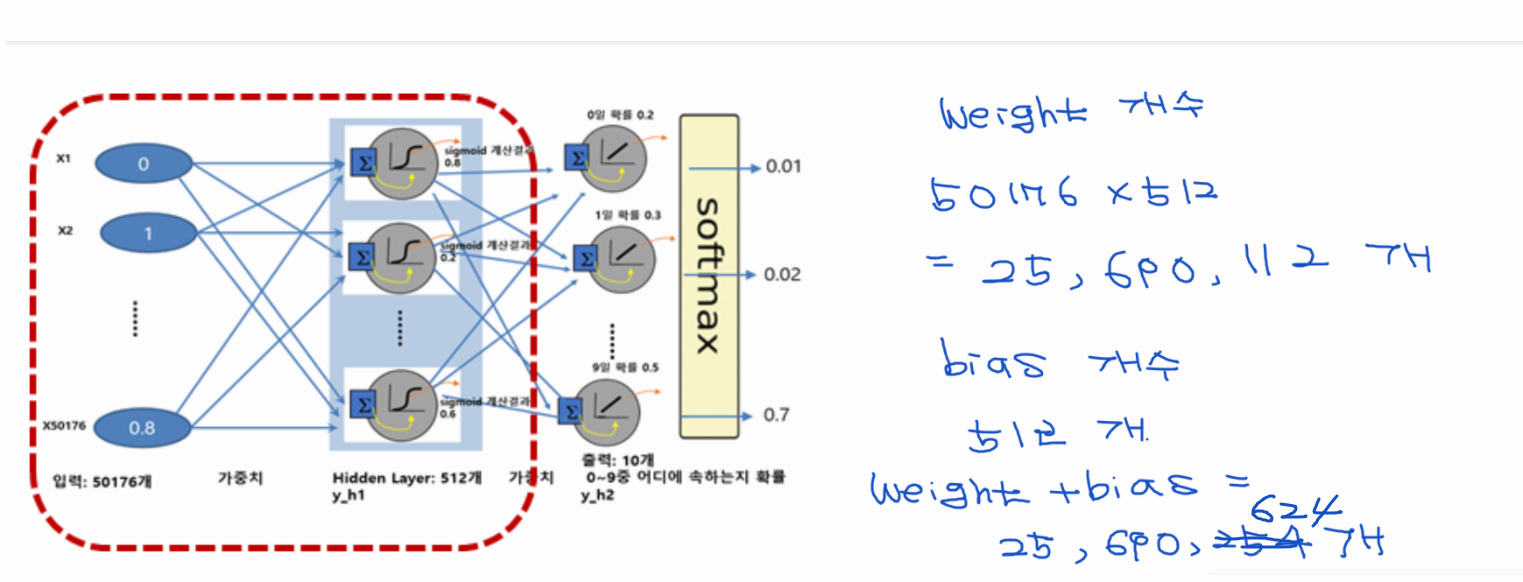

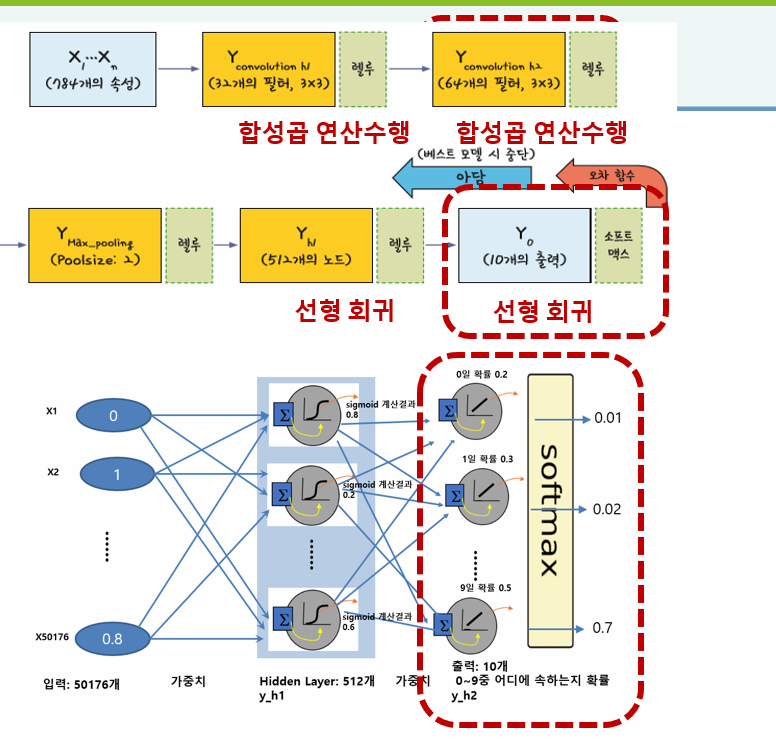

In [38]:
model.add(Dense(10, activation="softmax"))

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               25690624  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 25,714,570
Trainable params: 25,714,570
Non-trainable params: 0
____________________________________________

In [40]:
from tensorflow.keras.optimizers import Adam

In [41]:
model.compile(
               loss="categorical_crossentropy",
               optimizer=Adam(learning_rate=0.001),
               metrics=['acc']
              )

In [42]:
model.fit(X_train, y_train_onehot, batch_size=100, epochs=5 )

Epoch 1/5
600/600 [==============================] - 189s 314ms/step - loss: 3.8342 - acc: 0.9381
Epoch 2/5
600/600 [==============================] - 188s 313ms/step - loss: 0.0507 - acc: 0.9842
Epoch 3/5
600/600 [==============================] - 191s 319ms/step - loss: 0.0285 - acc: 0.9908
Epoch 4/5
600/600 [==============================] - 189s 314ms/step - loss: 0.0252 - acc: 0.9920
Epoch 5/5
600/600 [==============================] - 191s 318ms/step - loss: 0.0206 - acc: 0.9929


In [43]:
X_test.shape

(10000, 28, 28)

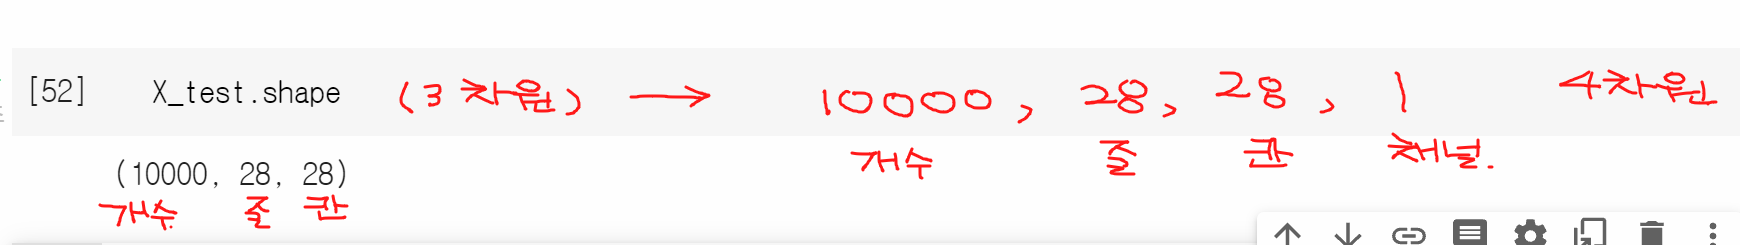

In [44]:
X_test = X_test.reshape(10000, 28, 28, 1)

In [45]:
X_test.shape

(10000, 28, 28, 1)

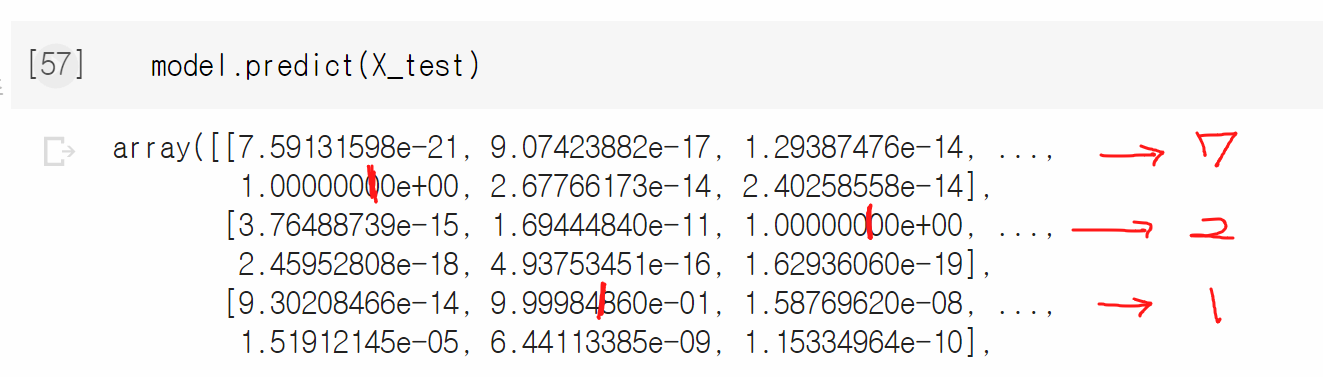

In [46]:
predict = model.predict(X_test)

In [47]:
predict

array([[1.4999457e-13, 1.3877747e-15, 1.6011350e-11, ..., 1.0000000e+00,
        2.9713684e-17, 1.8877013e-13],
       [4.4847130e-09, 1.3218646e-11, 1.0000000e+00, ..., 7.0763416e-14,
        3.6613629e-13, 2.1191724e-16],
       [2.1067766e-08, 9.9999833e-01, 1.1634610e-09, ..., 9.0699001e-07,
        7.6106033e-07, 3.6146636e-10],
       ...,
       [8.4085696e-19, 8.2721853e-17, 4.1329107e-18, ..., 2.2159476e-13,
        2.1709322e-10, 3.8803216e-13],
       [9.1503714e-13, 2.7486211e-15, 8.0810220e-11, ..., 7.4010818e-14,
        8.9634424e-03, 5.6774485e-12],
       [1.6959766e-16, 2.9469967e-17, 1.5362542e-13, ..., 4.6874218e-17,
        5.3080662e-15, 9.5341516e-20]], dtype=float32)

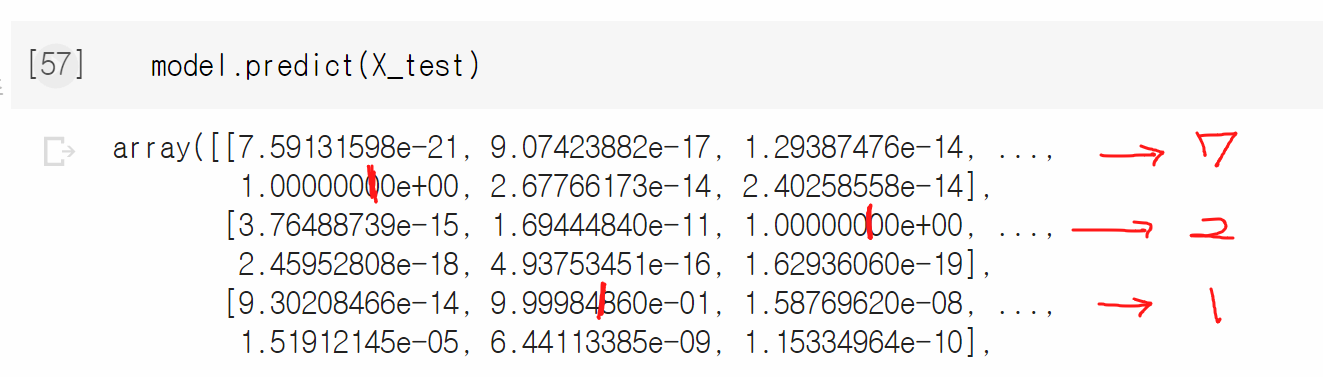

In [48]:
np.argmax(predict, 1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)